In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   0    Male   21                1         35.0                   0   
1   1    Male   43                1         28.0                   0   
2   2  Female   25                1         14.0                   1   
3   3  Female   35                1          1.0                   0   
4   4  Female   36                1         15.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0    1-2 Year            Yes         65101.0                 124.0      187   
1   > 2 Years            Yes         58911.0                  26.0      288   
2    < 1 Year             No         38043.0                 152.0      254   
3    1-2 Year            Yes          2630.0                 156.0       76   
4    1-2 Year             No         31951.0                 152.0      294   

   Response  
0         0  
1         1  
2         0  
3         0  
4         0

In [3]:
test_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  11504798  Female   20                1         47.0                   0   
1  11504799    Male   47                1         28.0                   0   
2  11504800    Male   47                1         43.0                   0   
3  11504801  Female   22                1         47.0                   1   
4  11504802    Male   51                1         19.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No          2630.0                 160.0      228  
1    1-2 Year            Yes         37483.0                 124.0      123  
2    1-2 Year            Yes          2630.0                  26.0      271  
3    < 1 Year             No         24502.0                 152.0      115  
4    1-2 Year             No         34115.0                 124.0      148

In [5]:
from ydata_profiling import ProfileReport

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
profile = ProfileReport(train_df)
profile

Render HTML: 100%|██████████| 1/1 [00:08<00:00,  8.45s/it]


### Data insight;
#### Data types
- id is unique identifier, numeric type, no missing value
- Gender is categorical, Male-6228134 , Female-5276664 no missing values
- Age is numerical, min;20, max; 85, mean; 38.38 STD: 14.99, no missing values
- Driving_License is categorical, binary feature, 1;11482041 , 0;22757 no missing values
- Region_Code is numeric, 54 distinct region codes, min; 0, max; 52. no missing values
- Previously_Insured is categorical, binary feature 0;6178116, 1;5326682, no missing values
- Vehicle_Age is categorical, 1-2 Year;5982678, < 1 Year; 5044145, > 2 Years;477975, no missing values
- Vehicle_Damage is boolean, True;5783229, False; 5721569, no missing values
- Annual_Premium is numeric, min; 2630, max; 540165, mean; 30461.37, STD; 16454.745, no missing values
- Policy_Sales_Channel is numeric, 152 distinct values, min;1, max; 163, mean;	112.42,STD; 16454.745 no missing values
- Vintage is numeric, 290 distinct values, min;10, max; 299, mean; 163.89, STD; 79.97, no missing values
- Response is the TARGET, binary feature, Very imbalanced ratio of about 1:10 of 1 to 0, 1-1415059 , 0-10089739. 

#### Steps to take in analysis and EDA
1. merge train and test files
2. mask out and save the ids
3. Visualise the Gender in bar chart, replace male with 1 and female with 0
4. visualise Driving License in bar chart, convert to integer datatype
5. Drop Region_code
6. Visualise Previously_Insured in bar chart, then convert to integer type
7. Visualise Vehicle_Age in column chart, then feature engineer with get dummy method
8. Visualise Vehicle_Damage in column chart and then convert True to 1 and False to 0, and convert to integer variable. 
9. Use boxplot to check for outliers and remove them in Annual_Premium
10. Use boxplot to check for outliers and remove them in Policy_Sales_Channel
11. Use boxplot to check for outliers and remove them in Vintage
12. Use barplot to see the imbalance nature of the target variable Response.


#### 1. merge train and test files

In [7]:

#join the test and trainset to ensure uniform preprocessing
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y = train_df['Response']
merged_data = pd.concat((train_df, test_df)).reset_index(drop=True)
merged_data.drop(['Response'], axis=1, inplace=True)
print("all_data size is : {}".format(merged_data.shape))

all_data size is : (19174664, 11)


#### Visualise the Gender in bar chart, replace male with 1 and female with 0

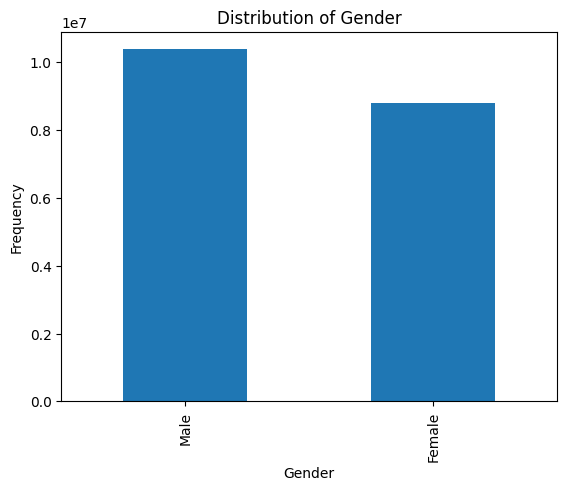

In [29]:
#plt.figure(figsize=(10, 6))
merged_data['Gender'].value_counts().plot(kind ='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Replace male and female
merged_data['Gender'] = merged_data['Gender'].replace({'Male': 1, 'Female': 0})

In [31]:
merged_data['Gender'].unique()

array([1, 0], dtype=int64)

#### 4. visualise Driving License in bar chart, convert to integer datatype

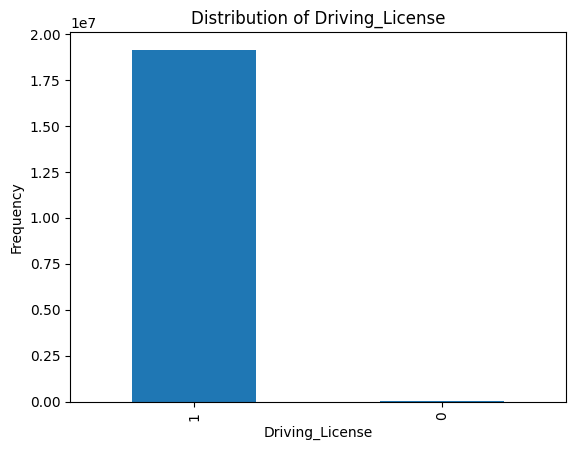

In [32]:
merged_data['Driving_License'].value_counts().plot(kind ='bar')
plt.title('Distribution of Driving_License')
plt.xlabel('Driving_License')
plt.ylabel('Frequency')
plt.show()

In [33]:
merged_data['Driving_License']=merged_data['Driving_License'].astype(int)

In [34]:
merged_data['Driving_License'].dtype

dtype('int32')

#### 5. Drop Region_code

In [35]:
merged_data.drop('Region_Code', axis= 1, inplace= True)

#### 6. Visualise Previously_Insured in bar chart, then convert to integer type

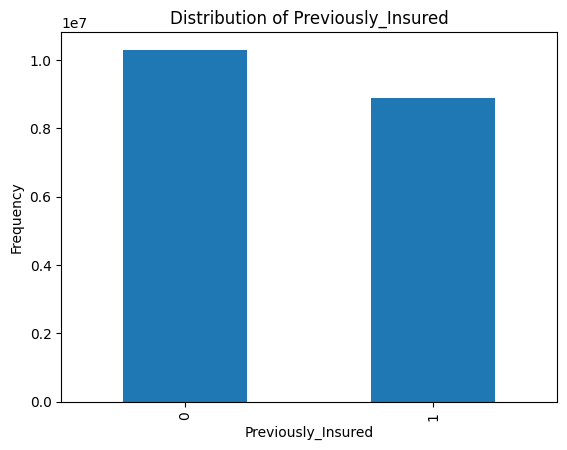

In [36]:
merged_data['Previously_Insured'].value_counts().plot(kind ='bar')
plt.title('Distribution of Previously_Insured')
plt.xlabel('Previously_Insured')
plt.ylabel('Frequency')
plt.show()

In [37]:
merged_data['Previously_Insured']=merged_data['Previously_Insured'].astype(int)

#### 7. Visualise Vehicle_Age in column chart, then feature engineer with get dummy method

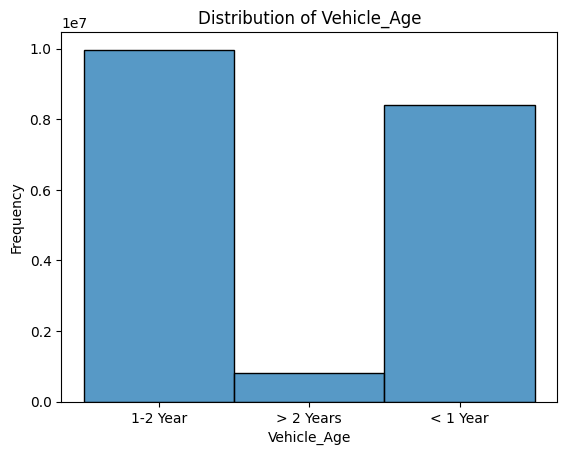

In [38]:
#plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Vehicle_Age'])
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

In [39]:
#get dummy variables from Vehicle_Age
merged_data['Vehicle_Age'] = merged_data['Vehicle_Age'].astype('category')
merged_data = pd.get_dummies(merged_data, columns=['Vehicle_Age'])
merged_data.head()

id  Gender  Age  Driving_License  Previously_Insured Vehicle_Damage  \
0   0       1   21                1                   0            Yes   
1   1       1   43                1                   0            Yes   
2   2       0   25                1                   1             No   
3   3       0   35                1                   0            Yes   
4   4       0   36                1                   1             No   

   Annual_Premium  Policy_Sales_Channel  Vintage  Vehicle_Age_1-2 Year  \
0         65101.0                 124.0      187                  True   
1         58911.0                  26.0      288                 False   
2         38043.0                 152.0      254                 False   
3          2630.0                 156.0       76                  True   
4         31951.0                 152.0      294                  True   

   Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  
0                 False                  False  
1                 False                   True  
2                  True                  False  
3                 False                  False  
4                 False                  False

#### 8. Visualise Vehicle_Damage in column chart and then convert True to 1 and False to 0, and convert to integer variable. 

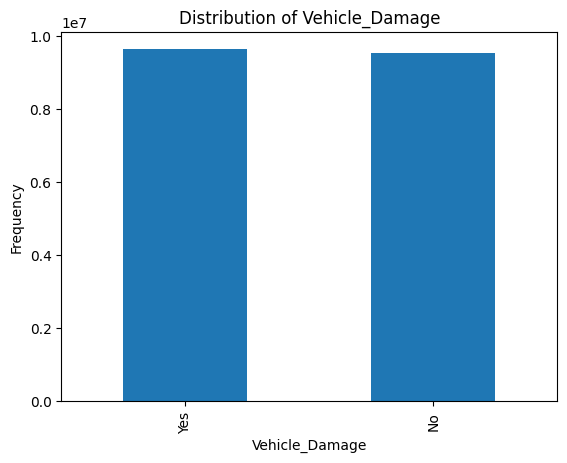

In [41]:
merged_data['Vehicle_Damage'].value_counts().plot(kind ='bar')
plt.title('Distribution of Vehicle_Damage')
plt.xlabel('Vehicle_Damage')
plt.ylabel('Frequency')
plt.show()

In [42]:
def veh_a(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0
  
merged_data['Vehicle_Damages'] = merged_data['Vehicle_Damage'].apply(veh_a)
merged_data.drop(['Vehicle_Damage'],axis=1)

id  Gender  Age  Driving_License  Previously_Insured  \
0                0       1   21                1                   0   
1                1       1   43                1                   0   
2                2       0   25                1                   1   
3                3       0   35                1                   0   
4                4       0   36                1                   1   
...            ...     ...  ...              ...                 ...   
19174659  19174659       1   57                1                   0   
19174660  19174660       1   28                1                   1   
19174661  19174661       1   47                1                   1   
19174662  19174662       1   30                1                   0   
19174663  19174663       1   23                1                   1   

          Annual_Premium  Policy_Sales_Channel  Vintage  Vehicle_Age_1-2 Year  \
0                65101.0                 124.0      187                  True   
1                58911.0                  26.0      288                 False   
2                38043.0                 152.0      254                 False   
3                 2630.0                 156.0       76                  True   
4                31951.0                 152.0      294                  True   
...                  ...                   ...      ...                   ...   
19174659         51661.0                 124.0      109                  True   
19174660         25651.0                 152.0      184                 False   
19174661          2630.0                 138.0       63                  True   
19174662         38866.0                 124.0      119                 False   
19174663         27498.0                 152.0       79                 False   

          Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damages  
0                        False                  False                1  
1                        False                   True                1  
2                         True                  False                0  
3                        False                  False                1  
4                        False                  False                0  
...                        ...                    ...              ...  
19174659                 False                  False                1  
19174660                  True                  False                0  
19174661                 False                  False                0  
19174662                  True                  False                1  
19174663                  True                  False                0  

[19174664 rows x 12 columns]

#### 9. Use boxplot to check for outliers and remove them in Annual_Premium

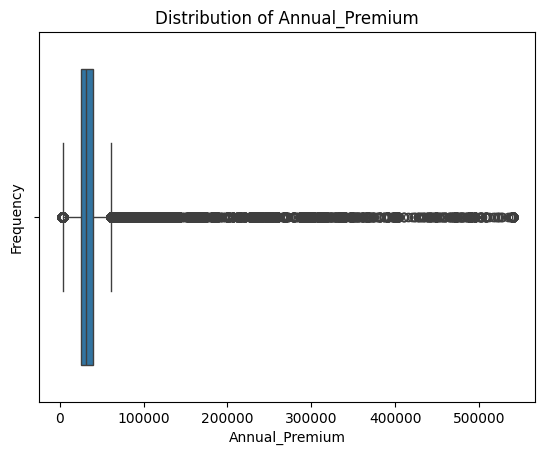

In [43]:
#plt.figure(figsize=(7, 4))
sns.boxplot(x=merged_data['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

#### 10. Use boxplot to check for outliers and remove them in Policy_Sales_Channel

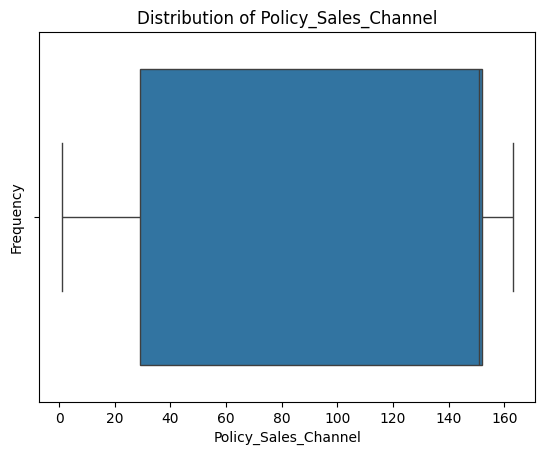

In [44]:
 #plt.figure(figsize=(7, 4))
sns.boxplot(x=merged_data['Policy_Sales_Channel'])
plt.title('Distribution of Policy_Sales_Channel')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Frequency')
plt.show()

#### 11. Use boxplot to check for outliers and remove them in Vintage

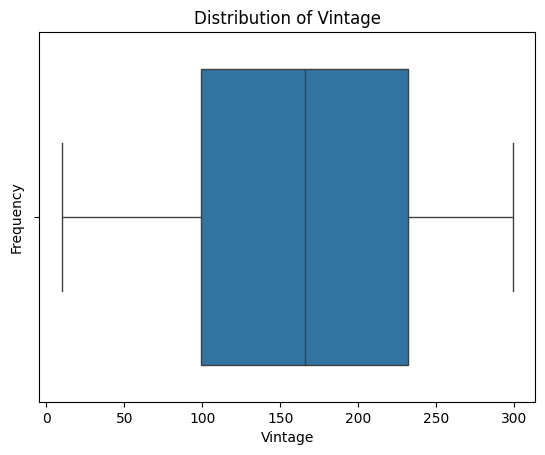

In [45]:
 #plt.figure(figsize=(7, 4))
sns.boxplot(x=merged_data['Vintage'])
plt.title('Distribution of Vintage')
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.show()

#### 12. Use barplot to see the imbalance nature of the target variable Response.

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

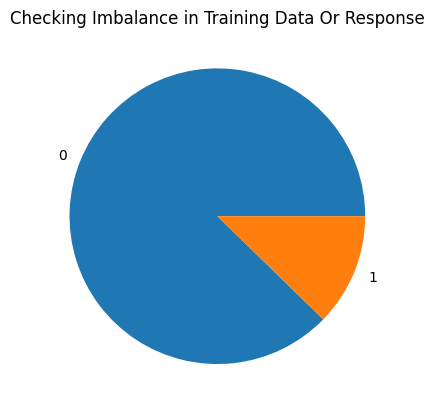

In [47]:
#Checking If training data is Imbalanced
response_data = train_df['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')

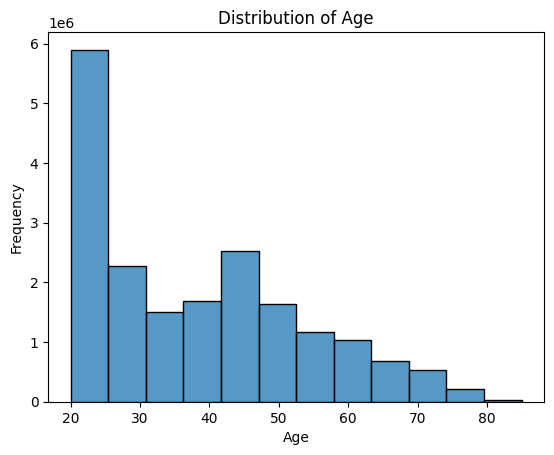

In [50]:
#plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Age'], kde=False, bins=12)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [51]:
merged_data['Age_Group'] = pd.cut(merged_data['Age'], bins=[20, 40, 60, 80], labels=['Youth', 'Middle_Aged', 'Aged'], include_lowest=True)


In [55]:
#merged_data.head()

In [54]:
#merged_data[merged_data.Age == 80]

In [57]:
#get dummy variables from Vehicle_Age
merged_data['Age_Group'] = merged_data['Age_Group'].astype('category')
merged_data = pd.get_dummies(merged_data, columns=['Age_Group'])
merged_data.head()

id  Gender  Age  Driving_License  Previously_Insured Vehicle_Damage  \
0   0       1   21                1                   0            Yes   
1   1       1   43                1                   0            Yes   
2   2       0   25                1                   1             No   
3   3       0   35                1                   0            Yes   
4   4       0   36                1                   1             No   

   Annual_Premium  Policy_Sales_Channel  Vintage  Vehicle_Age_1-2 Year  \
0         65101.0                 124.0      187                  True   
1         58911.0                  26.0      288                 False   
2         38043.0                 152.0      254                 False   
3          2630.0                 156.0       76                  True   
4         31951.0                 152.0      294                  True   

   Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  Vehicle_Damages  \
0                 False                  False                1   
1                 False                   True                1   
2                  True                  False                0   
3                 False                  False                1   
4                 False                  False                0   

   Age_Group_Youth  Age_Group_Middle_Aged  Age_Group_Aged  
0             True                  False           False  
1            False                   True           False  
2             True                  False           False  
3             True                  False           False  
4             True                  False           False

In [58]:
#merged_data.to_csv('processed_data.csv')

In [59]:
merged_data.drop(['Vehicle_Damage', 'Age'], axis=1, inplace=True)

#### Transform Annual_Premium, Policy_Sales_Channel, Vintage


In [60]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale = ['Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
merged_data[columns_to_scale] = scaler.fit_transform(merged_data[columns_to_scale])


In [61]:
merged_data.head()

id  Gender  Driving_License  Previously_Insured  Annual_Premium  \
0   0       1                1                   0        2.105499   
1   1       1                1                   0        1.729234   
2   2       0                1                   1        0.460755   
3   3       0                1                   0       -1.691855   
4   4       0                1                   1        0.090447   

   Policy_Sales_Channel   Vintage  Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  \
0              0.214589  0.288836                  True                 False   
1             -1.598518  1.551628                 False                 False   
2              0.732620  1.126530                 False                  True   
3              0.806624 -1.098985                  True                 False   
4              0.732620  1.626645                  True                 False   

   Vehicle_Age_> 2 Years  Vehicle_Damages  Age_Group_Youth  \
0                  False                1             True   
1                   True                1            False   
2                  False                0             True   
3                  False                1             True   
4                  False                0             True   

   Age_Group_Middle_Aged  Age_Group_Aged  
0                  False           False  
1                   True           False  
2                  False           False  
3                  False           False  
4                  False           False

#### Separate the data once again after analysis

In [62]:
train_data = merged_data[:ntrain]
test_data = merged_data[ntrain:]

In [63]:
train_data.to_csv('train_processed.csv')
test_data.to_csv('test_processed.csv')

In [2]:
train_=pd.read_csv('train_processed.csv')

In [3]:
test_=pd.read_csv('test_processed.csv')

In [4]:
train_.rename(columns={'Vehicle_Age_1-2 Year': 'Vehicle_Age_1_2_Year',
                          'Vehicle_Age_< 1 Year': 'Vehicle_Age__1_Year',
                          'Vehicle_Age_> 2 Years': 'Vehicle_Age__2_Years'},
                 inplace=True)

test_.rename(columns={'Vehicle_Age_1-2 Year': 'Vehicle_Age_1_2_Year',
                          'Vehicle_Age_< 1 Year': 'Vehicle_Age__1_Year',
                          'Vehicle_Age_> 2 Years': 'Vehicle_Age__2_Years'},
                 inplace=True)


# MODELING

### Lets try different methods of predicting imbalance data sets, to help with doing the job 

In [6]:
#method to evaluate and train randomforest
def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):
    rs=123
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

In [7]:
# Method to evaluate
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

In [8]:
# Method to resample original dataset
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under

In [9]:
#Method to visualise metrics
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()

In [10]:
# Tuned random forest parameters
best_params_no_weight = {'bootstrap': True,
                         'class_weight': None, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

In [41]:
train_.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Driving_License', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_1_2_Year', 'Vehicle_Age__1_Year', 'Vehicle_Age__2_Years',
       'Vehicle_Damages', 'Age_Group_Youth', 'Age_Group_Middle_Aged',
       'Age_Group_Aged'],
      dtype='object')

In [24]:
def split_data(df, target):
    return train_test_split(df, target, test_size=0.3, stratify=y, random_state = 123)

# Split the training and testing dataset
x_train, x_test, y_train, y_test = split_data(train_.drop(['Unnamed: 0','Age_Group_Middle_Aged',
                                                           'id','Gender','Driving_License','Age_Group_Aged',
                                                           'Vintage','Age_Group_Youth'], axis=1), y)

### Create a list to compare and assemble all metrics in one place

In [13]:
results = []

preds, model = build_rf(x_train, y_train, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds, "Original")
print(result)
results.append(result)

{'type': 'Original', 'accuracy': 0.8770530561157083, 'recall': 0.001121271653969914, 'auc': 0.5005107501675593, 'precision': 0.6118251928020566, 'fscore': 0.0011660370418386452}


#### Lets test class weight

In [14]:
class_weight = {}
# 0.2 to Non-churn class
class_weight[0] = 0.2
# 0.8 to Churn class
class_weight[1] = 0.8

# Pre-tuned hyper parameters
best_params_weight = {'bootstrap': True,
                         'class_weight': class_weight, 
                         'max_depth': 15, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

# class weight
preds_cw, weight_model = build_rf(x_train, y_train, x_test, best_params=best_params_weight)

result = evaluate(y_test, preds_cw, "Class Weight")
print(result)
results.append(result)

{'type': 'Class Weight', 'accuracy': 0.7586227777391465, 'recall': 0.8302239245450134, 'auc': 0.789402413100113, 'precision': 0.31652822570143274, 'fscore': 0.7814464447421765}


### Lets TRY SMOTE oversampling

In [43]:
X_smo, y_smo, X_under, y_under = resample(x_train, y_train)

In [15]:
# X_smo is resampled from X_train using SMOTE
# y_smo is resampled from y_train using SMOTE
# X_under is resampled from X_train using Undersampling
# y_under is resampled from y_train using Undersampling
X_smo, y_smo, X_under, y_under = resample(x_train, y_train)

#### Train with Oversampled SMOTE
preds_smo, smo_model = build_rf(X_smo, y_smo, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_smo, "SMOTE")
print(result)
results.append(result)

{'type': 'SMOTE', 'accuracy': 0.6975346522031384, 'recall': 0.9309546356102686, 'auc': 0.7978763687222046, 'precision': 0.28032105839185667, 'fscore': 0.8546589072899654}


#### Try SMOTE undersampling

In [16]:
preds_under, under_model = build_rf(X_under, y_under, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_under, "Undersampling")
print(result)
results.append(result)

{'type': 'Undersampling', 'accuracy': 0.6970878821593306, 'recall': 0.9319746159173463, 'auc': 0.7980601198778439, 'precision': 0.2801496907406293, 'fscore': 0.855423966097847}


#### Compare the performance among different random forest models
By now, we have built four different random forest models: the model trained with the original dataset, the model with class weights, the model trained with SMOTE dataset, and the model trained with undersampling.

To better analyze and compare their performance, we can visualize the metrics using a grouped bar chart.

            type  accuracy    recall       auc  precision    fscore
0       Original  0.877053  0.001121  0.500511   0.611825  0.001166
1   Class Weight  0.758623  0.830224  0.789402   0.316528  0.781446
2          SMOTE  0.697535  0.930955  0.797876   0.280321  0.854659
3  Undersampling  0.697088  0.931975  0.798060   0.280150  0.855424


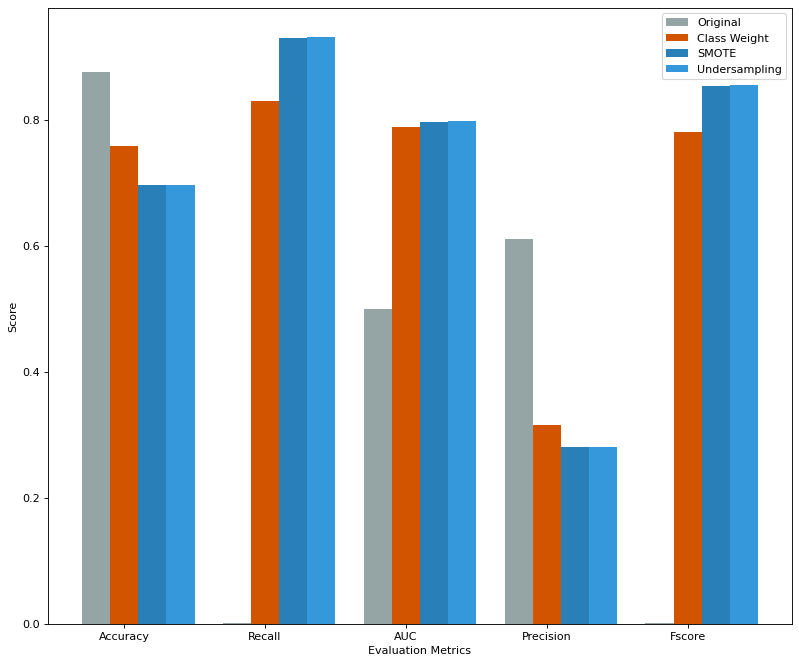

In [19]:
visualize_eval_metrics(results)

Let's first see what each color means. The grey bars represent the original model, the orange bars represent the model with class weight, the dark blue bars represent model trained with SMOTE, and the light blue bars represent the model trained with undersampling.

As we can infer the following insights from the bar charts:

- All models have high accuracy
- Recall is improved with class weights and resampling methods, and undersampling produces the highest recall
- AUC is also improved with class weights and resampling methods, and undersampling produces the highest AUC again
- Precisions are decreased with class weights and resampling methods as they all introduced many false positives (which are expected as we are trying to increase the impact of the positive class)
Fscore is improved with class weights and resampling method, and undersampling has the highest Fscore
By analyzing the bar chart above, we can see that undersampling seems to be the best method to help alleviate the imbalanced challenge in identify protein binders. Although all class weights, SMOTE, and undersampling decreased the precision (increased false positives) but sometimes it is not a bad idea to assume some of the proteins are binders and then later discover they not than to lose few binders insside millions of non binder that would be difficult to identify without automation. A trade-off I am willing to accept.

#### Lets define a utility function with undersampling technique to test

### Gidserach Utility

In [11]:
def grid_search_xgb_undersample(X_train, y_train):
    # Define the parameter grid for XGBoost
    params_grid = {
        'max_depth': [15, 20, 25],
        'n_estimators': [100,50],
        'scale_pos_weight': [5, 8, 10],
        #'learning_rate': [0.1, 0.5],
        #'gamma': [0.1, 0.3],
        #'subsample': [0.5, 0.8],
        #'colsample_bytree': [0.5, 0.8],
        #'reg_alpha': [0.1, 0.3],
        #'reg_lambda': [0.1, 0.3]
    }
    
    # Initialize the XGBClassifier model
    xgb_model = XGBClassifier(random_state=123)
    
    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='f1', cv=2, verbose=1)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Return the best parameters
    return grid_search.best_params_

# Perform grid search to find the best parameters
best_params = grid_search_xgb_undersample(x_train,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [12]:
best_params

{'max_depth': 15, 'n_estimators': 50, 'scale_pos_weight': 5}

params= {'max_depth': 15, 'n_estimators': 50, 'scale_pos_weight': 5}

In [49]:
params= {'learning_rate': 0.08, 'max_depth': 20, 'n_estimators': 100, 
         'scale_pos_weight':8}

#### Model Train Utility

In [25]:
def train_xgb_undersample(X_train, y_train, params):
    # Initialize the RandomUnderSampler
    under_sampler = RandomUnderSampler(random_state=123)
    
    # Initialize the XGBClassifier model with the best parameters
    xgb_model = XGBClassifier(**best_params, eval_metric='auc', random_state=123)
    
    # Fit the model to the data
    xgb_model.fit(X_train, y_train)
    
    return xgb_model

# Train the XGBClassifier model with the best parameters
xgb_model = train_xgb_undersample(x_train, y_train, best_params)

Confusion Matrix - XGBoost:
 [[2132327  894595]
 [  50052  374466]]


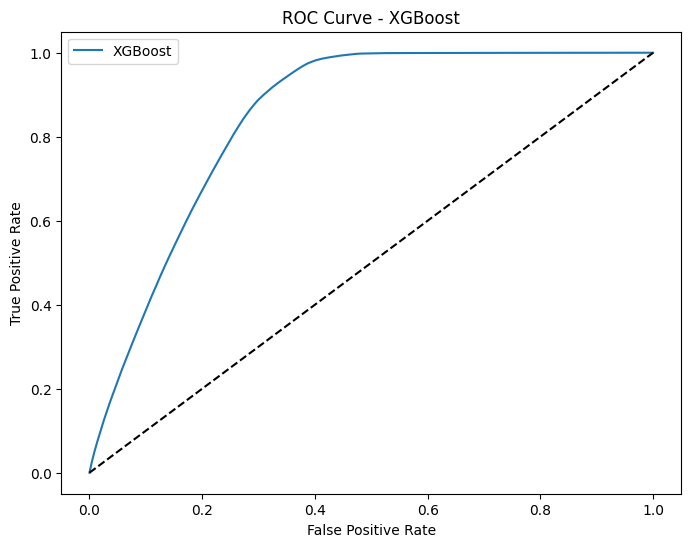

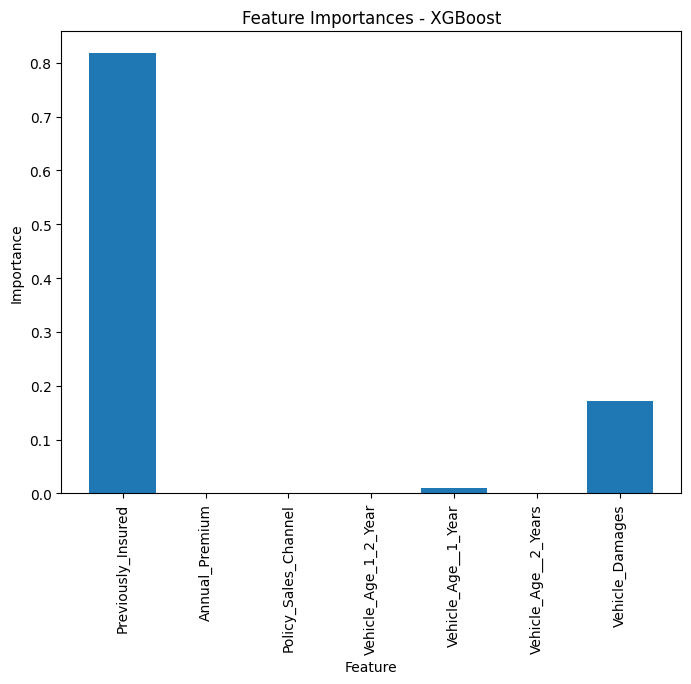

Metrics - XGBoost:
F1 Score: 0.4422185206595028
Recall: 0.8820968722174325
Precision: 0.29507328646928715
Accuracy: 0.7263035138956494


In [26]:
# Make predictions on the test set
preds = xgb_model.predict(x_test)
probs = xgb_model.predict_proba(x_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, preds)
print('Confusion Matrix - XGBoost:\n', cm)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

feature_importances = xgb_model.feature_importances_
feature_names = x_train.columns
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances)
plt.title('Feature Importances - XGBoost')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
print('Metrics - XGBoost:')
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Accuracy:', accuracy)

In [27]:
submit = xgb_model.predict_proba(test_.drop(['Unnamed: 0','Age_Group_Middle_Aged',
                                                           'id','Gender','Driving_License','Age_Group_Aged',
                                                           'Vintage','Age_Group_Youth'], axis=1))[:, 1]

# Create submission DataFrame and save to CSV
submit_df = pd.DataFrame({'id': test_['id'], 'Response': submit})
submit_df.to_csv('submit_7__xg.csv', index=False)